# Visión por computador

In [1]:
from PIL import Image
import numpy as np
import os

In [2]:
img = Image.open(os.path.join("data", "img_cat.jpeg"))

In [3]:
img.size

(1185, 1481)

In [4]:
I = np.array(img)

In [5]:
import matplotlib.pyplot as plt

In [6]:
I.shape

(1481, 1185, 3)

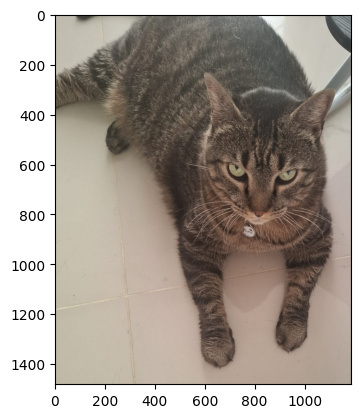

In [7]:
plt.imshow(I)   

In [9]:
I[:,:,0]

array([[190, 190, 190, ..., 115, 106, 119],
       [190, 190, 190, ..., 134, 130, 120],
       [190, 190, 190, ..., 147, 150, 127],
       ...,
       [190, 190, 190, ..., 177, 177, 158],
       [190, 190, 190, ..., 177, 177, 158],
       [190, 189, 189, ..., 177, 175, 157]], dtype=uint8)

In [10]:
I[:,:,0] = 0

In [11]:
I[:,:,0]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

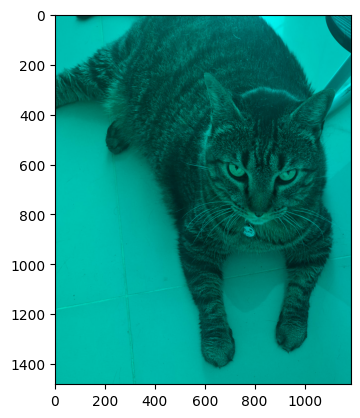

In [12]:
plt.imshow(I)

In [13]:
I[:,:,2] = 0

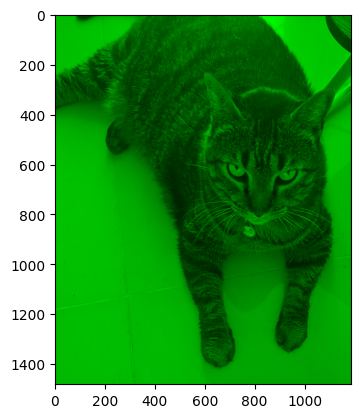

In [14]:
plt.imshow(I)

In [25]:
Ig = I[:,:,1]

In [22]:
Ig.shape

(1481, 1185)

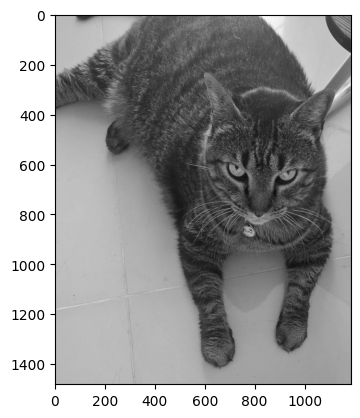

In [17]:
plt.imshow(Ig, cmap='gray')

(array([  8651., 166905., 316698., 256498., 140855., 116306., 316974.,
        421672.,   5996.,   4430.]),
 array([ 11. ,  35.3,  59.6,  83.9, 108.2, 132.5, 156.8, 181.1, 205.4,
        229.7, 254. ]),
 <BarContainer object of 10 artists>)

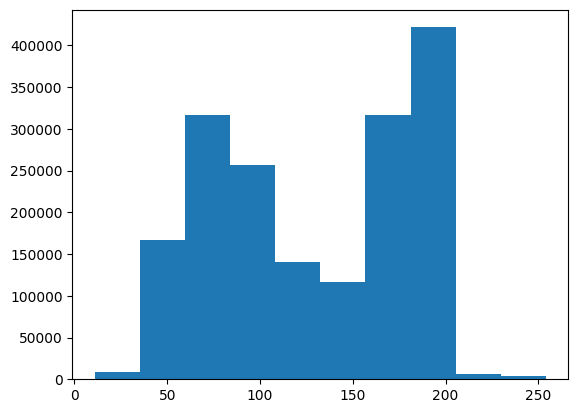

In [24]:
Ig = Ig.flatten()
plt.hist(Ig)

In [26]:
Ig = (np.maximum(Ig.astype(np.float32)-50, 0)).astype(np.uint8)

In [28]:
Igflat = Ig.flatten()

(array([312055., 268778., 188977., 115114.,  91900., 233125., 421023.,
        117351.,   3090.,   3572.]),
 array([  0. ,  20.4,  40.8,  61.2,  81.6, 102. , 122.4, 142.8, 163.2,
        183.6, 204. ]),
 <BarContainer object of 10 artists>)

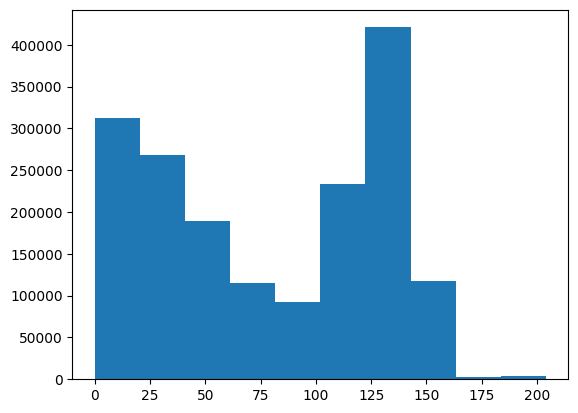

In [30]:
plt.hist(Igflat)

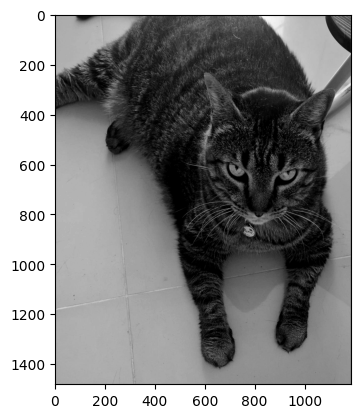

In [31]:
plt.imshow(Ig, cmap='gray')

In [35]:
Ig[:,800:820] = 255

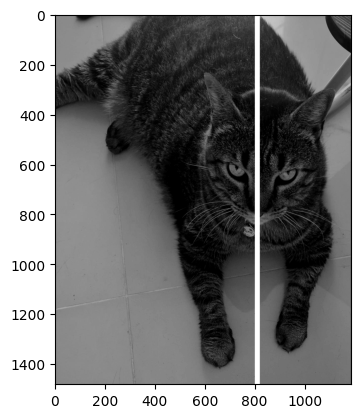

In [36]:
plt.imshow(Ig, cmap = 'gray')

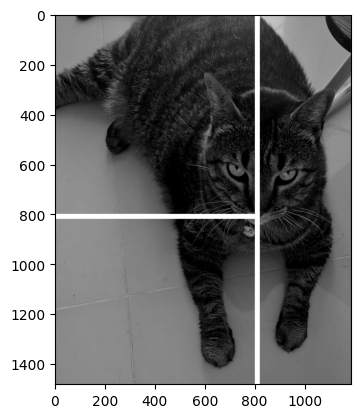

In [37]:
Ig[800:820,:800] = 255
plt.imshow(Ig,cmap='gray')

In [5]:
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt

In [3]:
img = Image.open(os.path.join("data", "img_cat.jpeg"))

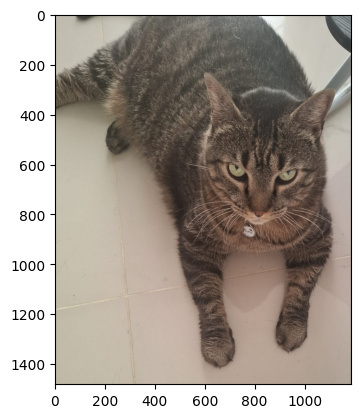

In [6]:
I = np.array(img)
plt.imshow(I)

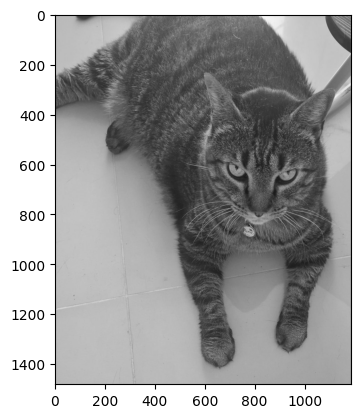

In [7]:
Ir = I[:,:,0]
Ig = I[:,:,1]
Ib = I[:,:,2]
Iprom = ((0.299)*Ir+(0.587)*Ig+(0.114)*Ib).astype(np.uint8)

Itot = np.stack([Iprom, Iprom, Iprom], axis=2)

plt.imshow(Itot)


In [8]:
Iprom.shape

(1481, 1185)

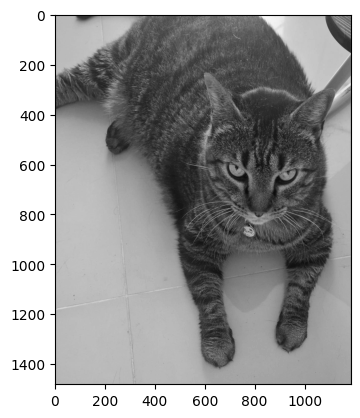

In [12]:
plt.imshow(Iprom, cmap='gray')  

In [14]:
Ifloat = Iprom/255.0

In [15]:
Ifloat

array([[0.7254902 , 0.7254902 , 0.7254902 , ..., 0.47058824, 0.43529412,
        0.48627451],
       [0.7254902 , 0.7254902 , 0.7254902 , ..., 0.54509804, 0.52941176,
        0.49019608],
       [0.7254902 , 0.7254902 , 0.7254902 , ..., 0.59607843, 0.60784314,
        0.51764706],
       ...,
       [0.71764706, 0.71764706, 0.71764706, ..., 0.65490196, 0.65490196,
        0.58039216],
       [0.71764706, 0.71764706, 0.71764706, ..., 0.65490196, 0.65490196,
        0.58039216],
       [0.71764706, 0.71372549, 0.71372549, ..., 0.65490196, 0.64705882,
        0.57647059]])

In [17]:
print(f"Valor mínimo: {Ifloat.min()}")
print(f"Valor máximo: {Ifloat.max()}")

Valor mínimo: 0.06274509803921569
Valor máximo: 0.9882352941176471


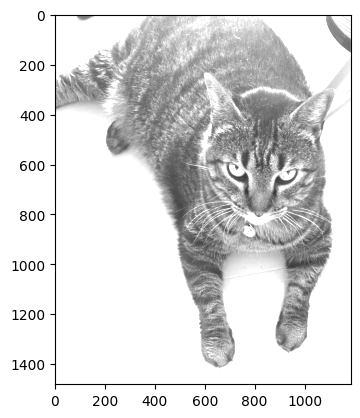

In [21]:
plt.imshow(Ifloat, cmap='gray', vmin=0, vmax=0.5)

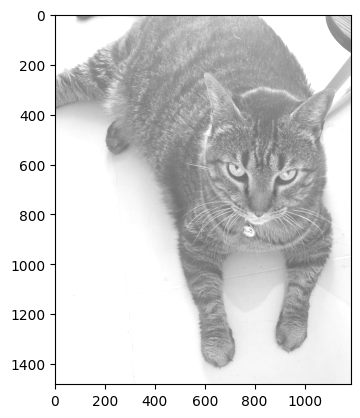

In [29]:
I2 = Ifloat+0.3
plt.imshow(I2, cmap='gray', vmin=0, vmax=1)

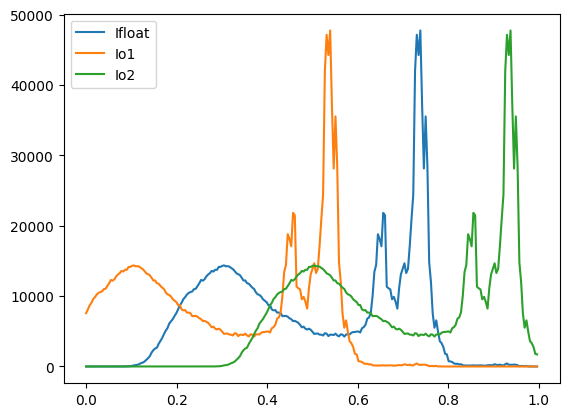

In [35]:
Io1 = Ifloat-0.2
Io2 = Ifloat+0.2
# Histogramas
histfloat, bins = np.histogram(Ifloat.flatten(), bins=256, range=(0.0, 1.0))
histIo1, bins = np.histogram(Io1.flatten(), bins=256, range=(0.0, 1.0))
histIo2, bins = np.histogram(Io2.flatten(), bins=256, range=(0.0, 1.0))
plt.figure()
plt.plot(bins[:-1], histfloat, label='Ifloat')
plt.plot(bins[:-1], histIo1, label='Io1')
plt.plot(bins[:-1], histIo2, label='Io2')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Aclarada')

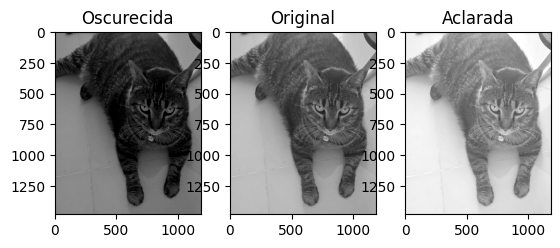

In [36]:
plt.figure()
plt.subplot(1,3,1)
plt.imshow(Io1, cmap='gray', vmin=0, vmax=1)
plt.title('Oscurecida')
plt.subplot(1,3,2)
plt.imshow(Ifloat, cmap='gray', vmin=0, vmax=1)
plt.title('Original')
plt.subplot(1,3,3)
plt.imshow(Io2, cmap='gray', vmin=0, vmax=1)
plt.title('Aclarada')

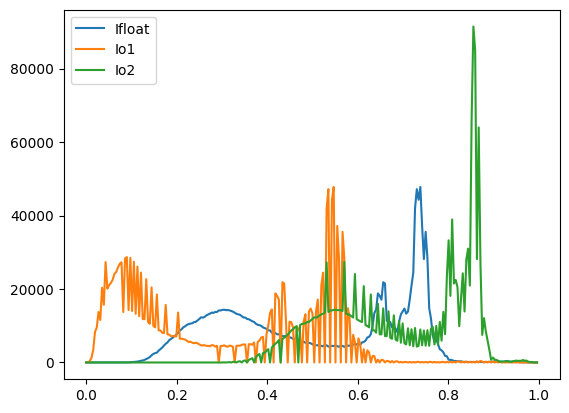

In [38]:
Io1 = Ifloat**2
Io2 = Ifloat**0.5
# Histogramas
histfloat, bins = np.histogram(Ifloat.flatten(), bins=256, range=(0.0, 1.0))
histIo1, bins = np.histogram(Io1.flatten(), bins=256, range=(0.0, 1.0))
histIo2, bins = np.histogram(Io2.flatten(), bins=256, range=(0.0, 1.0))
plt.figure()
plt.plot(bins[:-1], histfloat, label='Ifloat')
plt.plot(bins[:-1], histIo1, label='Io1')
plt.plot(bins[:-1], histIo2, label='Io2')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Aclarada')

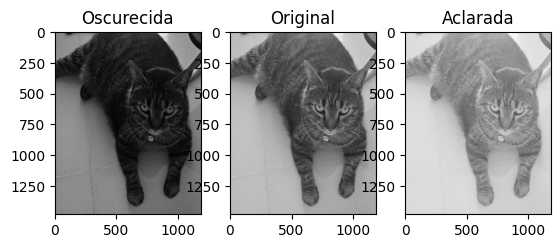

In [39]:
plt.figure()
plt.subplot(1,3,1)
plt.imshow(Io1, cmap='gray', vmin=0, vmax=1)
plt.title('Oscurecida')
plt.subplot(1,3,2)
plt.imshow(Ifloat, cmap='gray', vmin=0, vmax=1)
plt.title('Original')
plt.subplot(1,3,3)
plt.imshow(Io2, cmap='gray', vmin=0, vmax=1)
plt.title('Aclarada')

# Apliquemos operaciones lógicas

In [41]:
Ifloat[0,:]

array([0.7254902 , 0.7254902 , 0.7254902 , ..., 0.47058824, 0.43529412,
       0.48627451])

In [49]:
Imask = np.where(Ifloat < 0.5, 1, 0)
Imask[0,:]

array([0, 0, 0, ..., 1, 1, 1])

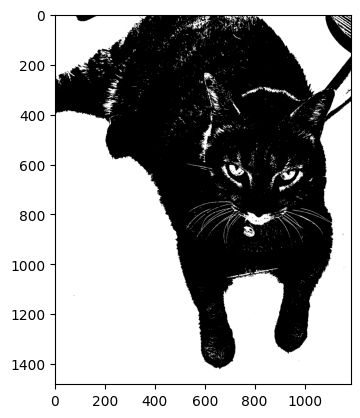

In [53]:
plt.imshow(1-Imask, cmap='gray', vmin=0, vmax=1)

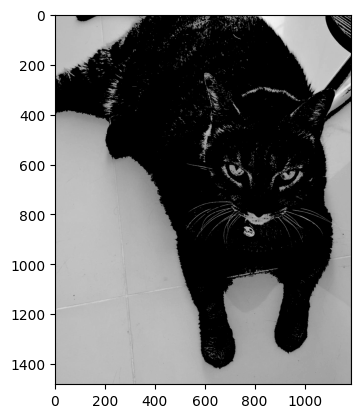

In [54]:
Io = np.multiply(Ifloat, 1-Imask)
plt.imshow(Io, cmap='gray', vmin=0, vmax=1)

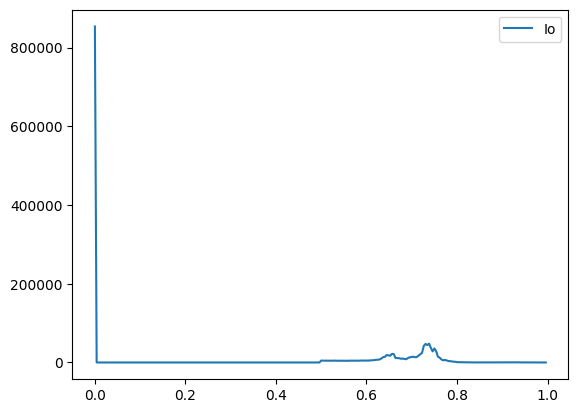

In [55]:
histIo = np.histogram(Io.flatten(), bins=256, range=(0.0, 1.0))[0]
plt.figure()
plt.plot(bins[:-1], histIo, label='Io')
plt.legend()